<a href="https://colab.research.google.com/github/algoritmosdenegociacion/modulo3/blob/main/M3_L3_Backtesting_GOOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Negociación basados en Machine Learning - Módulo 3
- Sergio Andrés Cabrales, Ph.D., Universidad de los Andes 
- Juan Pablo Cortés, T.A., Universidad de los Andes

https://github.com/algoritmosdenegociacion/

## 1. Carga de librerías, funciones y APIs necesarias.


#### 1.1. Se cargan las librerías necesarias

In [ ]:
pip install yfinance

In [ ]:
# Funciones numéricas adicionales
import numpy as np

# Lectura de datos y manejo de Data-sets
import pandas as pd

# Datos
import yfinance as yfin

# Gráficos 
import matplotlib.pyplot as plt

## 2. Obtención de datos históricos


#### 2.1. Se cargan los datos 


In [ ]:
# Descargamos datos
df = yfin.download('GOOGL', data_source='yahoo',start='2020-01-01', end='2021-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1348.410034,1368.680054,1346.489990,1368.680054,1368.680054,1363900
2020-01-03,1348.000000,1373.750000,1347.319946,1361.520020,1361.520020,1170400
2020-01-06,1351.630005,1398.319946,1351.000000,1397.810059,1397.810059,2338400
2020-01-07,1400.459961,1403.500000,1391.560059,1395.109985,1395.109985,1716500
2020-01-08,1394.819946,1411.849976,1392.630005,1405.040039,1405.040039,1765700
...,...,...,...,...,...,...
2020-12-24,1729.000000,1742.410034,1724.349976,1734.160034,1734.160034,465600
2020-12-28,1744.910034,1787.000000,1741.819946,1773.959961,1773.959961,1382500
2020-12-29,1787.229980,1788.469971,1755.109985,1757.760010,1757.760010,986300


## 3. Calcular la media móvil exponencial (EMA)

#### 3.1. Agregar al dataset las EMAs de 5 y 20 días

In [ ]:
# media móvil exponencial (EMA) 5 días
df['EMA_short'] = df['Close'].ewm(span=5, adjust=False).mean()

# media móvil exponencial (EMA) 20 días
df['EMA_long'] = df['Close'].ewm(span=20, adjust=False).mean()

df

,Open,High,Low,Close,Adj Close,Volume,EMA_short,EMA_long
Date,,,,,,,,
2020-01-02,1348.410034,1368.680054,1346.489990,1368.680054,1368.680054,1363900,1368.680054,1368.680054
2020-01-03,1348.000000,1373.750000,1347.319946,1361.520020,1361.520020,1170400,1366.293376,1367.998146
2020-01-06,1351.630005,1398.319946,1351.000000,1397.810059,1397.810059,2338400,1376.798937,1370.837375
2020-01-07,1400.459961,1403.500000,1391.560059,1395.109985,1395.109985,1716500,1382.902620,1373.149053
2020-01-08,1394.819946,1411.849976,1392.630005,1405.040039,1405.040039,1765700,1390.281759,1376.186289
...,...,...,...,...,...,...,...,...
2020-12-24,1729.000000,1742.410034,1724.349976,1734.160034,1734.160034,465600,1733.315954,1749.606845
2020-12-28,1744.910034,1787.000000,1741.819946,1773.959961,1773.959961,1382500,1746.863956,1751.926189
2020-12-29,1787.229980,1788.469971,1755.109985,1757.760010,1757.760010,986300,1750.495974,1752.481791


#### 3.2. Gráfico de los precios y las EMAs

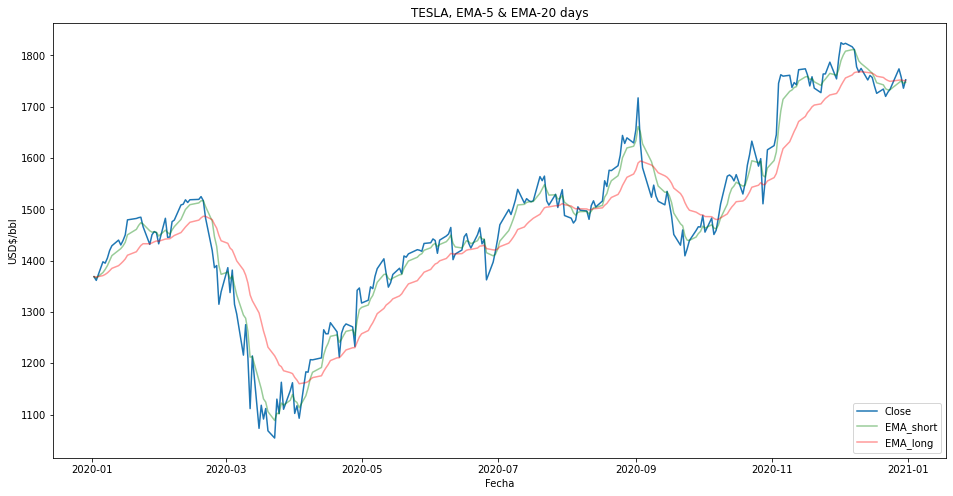

In [ ]:
# Gráfico de la serie de precios y sus medias móviles exponenciales.
plt.figure(figsize=(16,8))
plt.title('TESLA, EMA-5 & EMA-20 days')
plt.plot(df['Close'])
plt.plot(df['EMA_short'], color='green', alpha=0.4)
plt.plot(df['EMA_long'], color='red', alpha=0.4)
plt.xlabel('Fecha')
plt.ylabel('USD$/bbl')
plt.legend(['Close', 'EMA_short', 'EMA_long'], loc = 'lower right')
plt.show()

## 4. Obtención de señales de compra y venta

#### 4.1. Estrategia para obtener las señales

In [ ]:
# Número de datos
N = len(df)

# Crea una lista para almacenar las señales
  # -1 vender
  # 0 mantener
  # 1 comprar
signals = [0]

# Recorre la ventana de tiempo a partir del día 1
for i in range(1, N):

  # Obtiene las medias móviles exponenciales del día i
  short = df['EMA_short'][i]
  long = df['EMA_long'][i]

  # Obtiene las medias móviles exponenciales del día i-1
  p_short = df['EMA_short'][i-1]
  p_long = df['EMA_long'][i-1]

  # Compruebe si la EMA a corto plazo cruza por encima de la EMA a largo plazo
  if p_short < p_long and short >= long:
    signals.append(1)

  # Compruebe si la EMA a corto plazo cruza por debajo de la EMA a largo plazo
  elif p_short > p_long and short <= long:
    signals.append(-1)

  # Cuando las medias móviles exponenciales no se cruzan
  else:
    signals.append(0)

df['Signals'] = signals
df

,Open,High,Low,Close,Adj Close,Volume,EMA_short,EMA_long,Signals
Date,,,,,,,,,
2020-01-02,1348.410034,1368.680054,1346.489990,1368.680054,1368.680054,1363900,1368.680054,1368.680054,0
2020-01-03,1348.000000,1373.750000,1347.319946,1361.520020,1361.520020,1170400,1366.293376,1367.998146,0
2020-01-06,1351.630005,1398.319946,1351.000000,1397.810059,1397.810059,2338400,1376.798937,1370.837375,1
2020-01-07,1400.459961,1403.500000,1391.560059,1395.109985,1395.109985,1716500,1382.902620,1373.149053,0
2020-01-08,1394.819946,1411.849976,1392.630005,1405.040039,1405.040039,1765700,1390.281759,1376.186289,0
...,...,...,...,...,...,...,...,...,...
2020-12-24,1729.000000,1742.410034,1724.349976,1734.160034,1734.160034,465600,1733.315954,1749.606845,0
2020-12-28,1744.910034,1787.000000,1741.819946,1773.959961,1773.959961,1382500,1746.863956,1751.926189,0
2020-12-29,1787.229980,1788.469971,1755.109985,1757.760010,1757.760010,986300,1750.495974,1752.481791,0


#### 4.2. Gráfico de las señales de trading

In [ ]:
df['Buy'] = np.where(df['Signals']==1, df['Close'], np.nan)
df['Sell'] = np.where(df['Signals']==-1, df['Close'], np.nan)
df

,Open,High,Low,Close,Adj Close,Volume,EMA_short,EMA_long,Signals,Buy,Sell
Date,,,,,,,,,,,
2020-01-02,1348.410034,1368.680054,1346.489990,1368.680054,1368.680054,1363900,1368.680054,1368.680054,0,NaN,NaN
2020-01-03,1348.000000,1373.750000,1347.319946,1361.520020,1361.520020,1170400,1366.293376,1367.998146,0,NaN,NaN
2020-01-06,1351.630005,1398.319946,1351.000000,1397.810059,1397.810059,2338400,1376.798937,1370.837375,1,1397.810059,NaN
2020-01-07,1400.459961,1403.500000,1391.560059,1395.109985,1395.109985,1716500,1382.902620,1373.149053,0,NaN,NaN
2020-01-08,1394.819946,1411.849976,1392.630005,1405.040039,1405.040039,1765700,1390.281759,1376.186289,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1729.000000,1742.410034,1724.349976,1734.160034,1734.160034,465600,1733.315954,1749.606845,0,NaN,NaN
2020-12-28,1744.910034,1787.000000,1741.819946,1773.959961,1773.959961,1382500,1746.863956,1751.926189,0,NaN,NaN
2020-12-29,1787.229980,1788.469971,1755.109985,1757.760010,1757.760010,986300,1750.495974,1752.481791,0,NaN,NaN


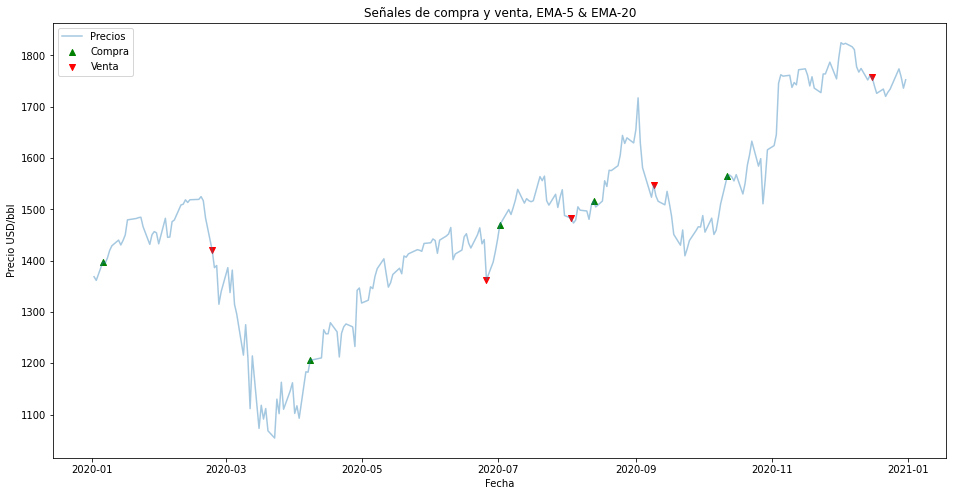

In [ ]:
# Mostrar visualmente las señales de compra y venta de acciones
plt.figure(figsize=(16,8))
plt.plot(df['Close'], alpha = 0.4, label = 'Precios')

plt.scatter(df.index, df['Buy'], color='green', marker='^', label = 'Compra')
plt.scatter(df.index, df['Sell'], color = 'red', marker='v', label = 'Venta')

plt.title('Señales de compra y venta, EMA-5 & EMA-20')
plt.xlabel('Fecha')
plt.ylabel('Precio USD/bbl')
plt.legend(loc='upper left')
plt.show()

## 5. Backtesting - Calcular el desempeño de una estrategia

#### 5.1. Cálculo de capital a lo largo de la venta de tiempo

In [ ]:
# Número de datos
N = len(df)

# Crea una lista para almacenar el capital
# Emezamos con 100 USD
equity = [100]

# Take Profit al 3% y Stop Loss al 1%
TP = 0.03
SL = 0.01

pos = 0
price = -1

# Recorre la ventana de tiempo a partir del día 1
for i in range(1, N):
  
  equity.append( equity[i-1] )

  if pos == 1:
    
    if df['Close'][i] >= price*(1 + TP):
      equity[i] *= 1 + TP
      pos = 0
    
    elif df['Close'][i] <= price*(1 - SL):
      equity[i] *= 1 - SL
      pos = 0

  elif pos == -1:

    if df['Close'][i] <= price*(1 - TP):
      equity[i] *= 1 + TP
      pos = 0
    
    elif df['Close'][i] >= price*(1 + SL):
      equity[i] *= 1 - SL
      pos = 0

  else:

    if df['Signals'][i] != 0:
      pos = df['Signals'][i]
      price = df['Close'][i]

df['Equity'] = equity


#### 5.2. Gráfico del capital

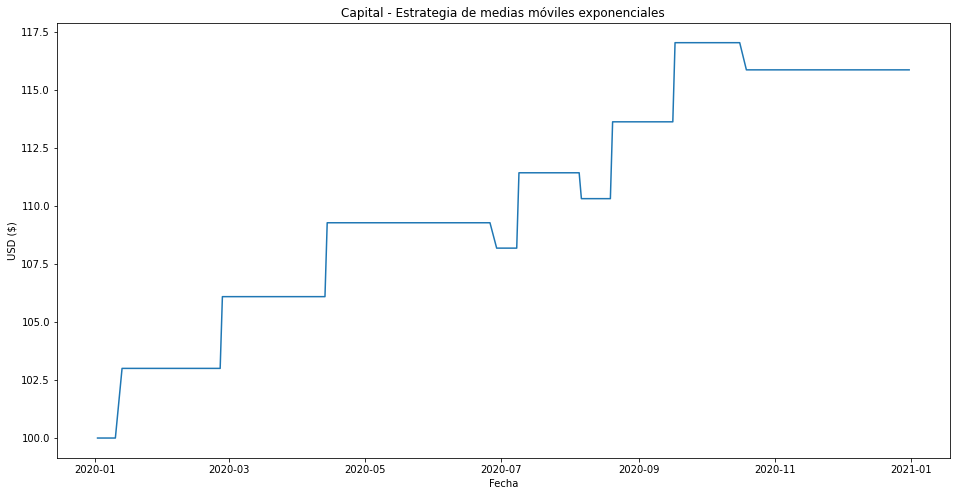

In [ ]:
# Mostrar visualmente el equity a lo largo de la ventana de tiempo
plt.figure(figsize=(16,8))
plt.plot(df['Equity'])

plt.title('Capital - Estrategia de medias móviles exponenciales')
plt.xlabel('Fecha')
plt.ylabel('USD ($)')
plt.show()

#### 5.3. Comparación con un portafolio de mercado

In [ ]:
mkt = yfin.download('^GSPC', start='2020-01-01', end='2021-01-01')
mkt

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000


In [ ]:
mkt['Close_100'] = (100/mkt['Close'][0])*mkt['Close']
mkt

,Open,High,Low,Close,Adj Close,Volume,Close_100
Date,,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000,100.000000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000,99.294013
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000,99.644856
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000,99.365527
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000,99.852662
...,...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000,113.665760
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000,114.657212
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000,114.401827


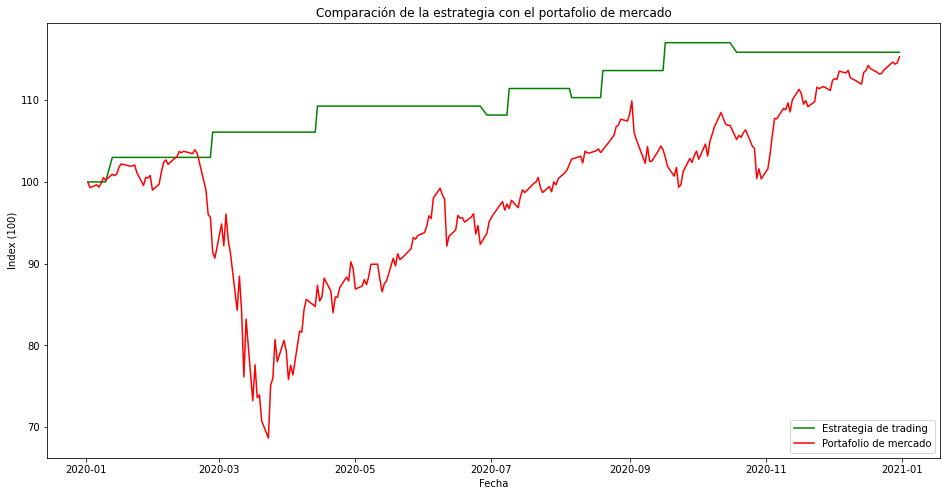

In [ ]:
# Comparación de la estrategia con el portafolio de mercado
plt.figure(figsize=(16,8))
plt.plot(df['Equity'], color = 'green', label = 'Estrategia de trading')
plt.plot(mkt['Close_100'], color = 'red', label = 'Portafolio de mercado')

plt.title('Comparación de la estrategia con el portafolio de mercado')
plt.xlabel('Fecha')
plt.ylabel('Index (100)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Desempeño de la estrategia planteada
df['Log Returns'] = np.log(df['Equity']).diff()

ret = 252*df['Log Returns'].mean()
print('Retorno esperado anulizado: {:.4f}'.format(ret))

vol = np.sqrt(252)*df['Log Returns'].std()
print('Volatilidad anulizada: {:.4f}'.format(vol))

sharpe_ratio = (ret - 0.01)/vol
print('Sharpe Ratio: {:.4f}'.format(sharpe_ratio))

Retorno esperado anulizado: 0.1472
Volatilidad anulizada: 0.0740
Sharpe Ratio: 1.8532


In [ ]:
# Desempeño del portafolio de mercado
mkt['Log Returns'] = np.log(mkt['Close']).diff()

ret = 252*mkt['Log Returns'].mean()
print('Retorno esperado anulizado: {:.4f}'.format(ret))

vol = np.sqrt(252)*mkt['Log Returns'].std()
print('Volatilidad anulizada: {:.4f}'.format(vol))

sharpe_ratio = (ret - 0.01)/vol
print('Sharpe Ratio: {:.4f}'.format(sharpe_ratio))

Retorno esperado anulizado: 0.1423
Volatilidad anulizada: 0.3475
Sharpe Ratio: 0.3808
